<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Notes/Load_CSV_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/load_data/csv

## Examples of how to use CSV data with TensorFlow.
* Loading the data off disk
* Pre-processing it into a form suitable for training.)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

### In memory data
For any small CSV dataset the simplest way to train a TensorFlow model on it is to load it into memory as a `pandas Dataframe` or a `NumPy array`.

A relatively simple example is the `abalone dataset`.

* The dataset is small.
* All the input features are all limited-range floating point values.

## Abalone Dataset

In [5]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv"
abalone_df = pd.read_csv(url, names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight","Viscera weight", "Shell weight", "Age"])
abalone_df.head(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14


The nominal task for this dataset is to predict the age from the other measurements, so separate the features and labels for training:



In [6]:
abalone_features = abalone_df.copy()
abalone_labels = abalone_features.pop('Age')

For this dataset you will treat all features identically. Pack the features into a single NumPy array.

In [7]:
abalone_features = np.array(abalone_features)

Next make a regression model predict the `age`. Since there is only a single input tensor, a `keras.Sequential model` is sufficient here.

In [10]:
# building a model
alabone_model = tf.keras.Sequential([
                                     tf.keras.layers.Dense(32, 'relu'),
                                     tf.keras.layers.Dense(1)
])
# compile the model
alabone_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
# earlt stopping callback
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
# training the model
history = alabone_model.fit(abalone_features, abalone_labels, epochs=10, validation_split=0.2, callbacks=[early_stopping_cb])

Epoch 1/10
83/83 [==============================] - 1s 3ms/step - loss: 97.8235 - mse: 97.8235 - val_loss: 83.7489 - val_mse: 83.7489
Epoch 2/10
83/83 [==============================] - 0s 1ms/step - loss: 66.0444 - mse: 66.0444 - val_loss: 47.2948 - val_mse: 47.2948
Epoch 3/10
83/83 [==============================] - 0s 1ms/step - loss: 31.2606 - mse: 31.2606 - val_loss: 18.9639 - val_mse: 18.9639
Epoch 4/10
83/83 [==============================] - 0s 1ms/step - loss: 12.9971 - mse: 12.9971 - val_loss: 9.8988 - val_mse: 9.8988
Epoch 5/10
83/83 [==============================] - 0s 1ms/step - loss: 9.1074 - mse: 9.1074 - val_loss: 8.7558 - val_mse: 8.7558
Epoch 6/10
83/83 [==============================] - 0s 1ms/step - loss: 8.6445 - mse: 8.6445 - val_loss: 8.5077 - val_mse: 8.5077
Epoch 7/10
83/83 [==============================] - 0s 1ms/step - loss: 8.4379 - mse: 8.4379 - val_loss: 8.2976 - val_mse: 8.2976
Epoch 8/10
83/83 [==============================] - 0s 2ms/step - loss: 8.24

### How to apply preprocessing to normalize numeric columns.
It's a good practice to normalize features that have different scales and range.
Features are multiplied by model weight so the scale of the output and the scale of the gradient are affected by the scale of the input

In [13]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,0.522693,0.406575,0.139271,0.824734,0.357705,0.180162,0.237921,9.896988
std,0.121164,0.100120,0.042708,0.491182,0.222223,0.110182,0.140261,3.205654
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.436375,0.181500,0.092000,0.127375,8.000000
50%,0.540000,0.425000,0.140000,0.795250,0.335500,0.170750,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.504500,0.253125,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


In [14]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(abalone_features)

In [18]:
alabone_model_normalized = tf.keras.Sequential([
                                                normalizer,
                                                tf.keras.layers.Dense(32, 'relu'),
                                                tf.keras.layers.Dense(1)
])
# compile 
alabone_model_normalized.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
# train
alabone_model_normalized_history = alabone_model_normalized.fit(abalone_features, abalone_labels, epochs=10, validation_split=0.2, callbacks=[early_stopping_cb])

Epoch 1/10
83/83 [==============================] - 1s 3ms/step - loss: 91.0261 - mse: 91.0261 - val_loss: 72.3000 - val_mse: 72.3000
Epoch 2/10
83/83 [==============================] - 0s 1ms/step - loss: 58.0323 - mse: 58.0323 - val_loss: 43.8716 - val_mse: 43.8716
Epoch 3/10
83/83 [==============================] - 0s 2ms/step - loss: 37.9976 - mse: 37.9976 - val_loss: 31.3391 - val_mse: 31.3391
Epoch 4/10
83/83 [==============================] - 0s 1ms/step - loss: 30.6579 - mse: 30.6579 - val_loss: 26.6261 - val_mse: 26.6261
Epoch 5/10
83/83 [==============================] - 0s 2ms/step - loss: 25.9872 - mse: 25.9872 - val_loss: 22.2142 - val_mse: 22.2142
Epoch 6/10
83/83 [==============================] - 0s 2ms/step - loss: 20.8873 - mse: 20.8873 - val_loss: 17.2580 - val_mse: 17.2580
Epoch 7/10
83/83 [==============================] - 0s 1ms/step - loss: 15.6987 - mse: 15.6987 - val_loss: 12.6346 - val_mse: 12.6346
Epoch 8/10
83/83 [==============================] - 0s 2ms/ste

### Hyperparameter tuning

In [20]:
pip install keras-tuner

     |████████████████████████████████| 97 kB 4.5 MB/s 


In [21]:
import keras_tuner as kt

In [41]:
# hyper model building
def build_hypermodel(hp):
  model = tf.keras.Sequential()
  # tune the number of units in hidden layer#1
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(tf.keras.layers.Dense(hp_units, 'relu'))
  model.add(tf.keras.layers.Dense(1))
  # compile
  model.compile(optimizer='adam', loss= 'mse', metrics=['mse'])
  # return compiled model
  return model

In [42]:
# Instantiate the tuner and perform hypertuning
tuner = kt.Hyperband(hypermodel=build_hypermodel, objective='val_mse', max_epochs=25, factor=3, directory='my_dir', project_name='into_to_kt', overwrite=True)

In [39]:
# early stopping callback
def early_stop():
  return tf.keras.callbacks.EarlyStopping()

In [43]:
early_stop_cb = early_stop()
tuner.search(abalone_features, abalone_labels, epochs=50, validation_split=0.2, callbacks=[early_stop_cb])

Trial 21 Complete [00h 00m 00s]
val_mse: 19.168598175048828

Best val_mse So Far: 9.020617485046387
Total elapsed time: 00h 00m 17s
INFO:tensorflow:Oracle triggered exit


In [44]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print('Best Hyperparameters found \n Number of units in 1st hidden layer',best_hps.get('units'))

Best Hyperparameters found 
 Number of units in 1st hidden layer 480


In [45]:
final_abalone_model = tuner.hypermodel.build(best_hps)

In [47]:
final_abalone_model.fit(abalone_features, abalone_labels, epochs=10, validation_split=0.2)

Epoch 1/10
83/83 [==============================] - 0s 2ms/step - loss: 8.8153 - mse: 8.8153 - val_loss: 8.2294 - val_mse: 8.2294
Epoch 2/10
83/83 [==============================] - 0s 2ms/step - loss: 7.8401 - mse: 7.8401 - val_loss: 7.3939 - val_mse: 7.3939
Epoch 3/10
83/83 [==============================] - 0s 2ms/step - loss: 7.1174 - mse: 7.1174 - val_loss: 6.8567 - val_mse: 6.8567
Epoch 4/10
83/83 [==============================] - 0s 2ms/step - loss: 6.6961 - mse: 6.6961 - val_loss: 6.5326 - val_mse: 6.5326
Epoch 5/10
83/83 [==============================] - 0s 2ms/step - loss: 6.4432 - mse: 6.4432 - val_loss: 6.2760 - val_mse: 6.2760
Epoch 6/10
83/83 [==============================] - 0s 2ms/step - loss: 6.2236 - mse: 6.2236 - val_loss: 6.1691 - val_mse: 6.1691
Epoch 7/10
83/83 [==============================] - 0s 2ms/step - loss: 6.0184 - mse: 6.0184 - val_loss: 5.9122 - val_mse: 5.9122
Epoch 8/10
83/83 [==============================] - 0s 2ms/step - loss: 5.8143 - mse: 5.81

## The "Titanic" dataset
**Mixed data types**<br>
The "Titanic" dataset contains information about the passengers on the Titanic. The nominal task on this dataset is to predict who survived.

In [48]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head(3)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y


In [49]:
# check for missing values
titanic.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [50]:
# features and labels
titanic_features = titanic.copy()
titanic_lables = titanic_features.pop('survived')

In [71]:
titanic_features.describe().iloc[:3]

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730


In [64]:
titanic_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


Because of the different data types and ranges you can't simply stack the features into `NumPy array` and pass it to a `keras.Sequential model`. Each column needs to be handled individually.

As one option, you could preprocess your data offline (using any tool you like) to convert categorical columns to numeric columns, then pass the processed output to your TensorFlow model. The disadvantage to that approach is that if you save and export your model the preprocessing is not saved with it. The experimental.preprocessing layers avoid this problem because they're part of the model.


The `functional API` operates on `"symbolic"` tensors. Normal `"eager"` tensors have a value. In contrast these `"symbolic"` tensors do not. **Instead they keep track of which operations are run on them, and build representation of the calculation, that you can run later**


To build the preprocessing model, start by building a set of symbolic keras.Input objects, matching the names and data-types of the CSV columns.



In [115]:
inputs = {}

for name, values in titanic_features.items():
  dtype = values.dtype
  if dtype == 'object':
    dtype= tf.string
  else:
    dtype = tf.int64 if dtype=='int64' else tf.float64
  inputs[name]=tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'age')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'fare')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'parch')>,
 'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>}

The first step in your preprocessing logic is to concatenate the numeric inputs together, and run them through a normalization layer:

In [119]:
numerical_inputs = {k:v for k,v in inputs.items() if v.dtype==tf.float64}
int_cat_inputs = {k:v for k,v in inputs.items() if v.dtype==tf.int64}
str_cat_inputs = {k:v for k,v in inputs.items() if v.dtype==tf.string}

In [120]:
# numerical input preprocessing

x = tf.keras.layers.concatenate(list(numerical_inputs.values()))
# normalzier
titanic_norm = tf.keras.layers.experimental.preprocessing.Normalization()
titanic_norm.adapt(titanic_features[numerical_inputs.keys()])
# preprocessing
all_numerical_inputs = titanic_norm(x)

For the string inputs use the `preprocessing.StringLookup` function to map from strings to integer indices in a vocabulary. Next, use `preprocessing.CategoryEncoding` to convert the indexes into float32 data appropriate for the model.

The default settings for the `preprocessing.CategoryEncoding` layer create a one-hot vector for each input. A layers.Embedding would also work

In [129]:
# preprocessing integer category and string category fields 

def cat_processing(feature_dict , df, is_string):
  df = df.copy()
  lookup = tf.keras.layers.experimental.preprocessing.StringLookup() if is_string else tf.keras.layers.experimental.preprocessing.IntegerLookup()
  # learning the unique vals
  lookup.adapt(df[feature_dict.keys()])
  # concatenation of layers
  layer_concat = tf.keras.layers.concatenate(list(feature_dict.values()))
  # vocab indices
  indices = lookup(layer_concat)
  # onehotencode
  return tf.keras.layers.experimental.preprocessing.CategoryEncoding(num_tokens=lookup.vocabulary_size())(indices)


# integer category
all_int_cat_inputs = cat_processing(int_cat_inputs, titanic_features, False)
all_str_cat_inputs = cat_processing(str_cat_inputs, titanic_features, True)

In [133]:
# Collect all the symbolic preprocessing results, to concatenate them later.
preprocessed_inputs = [all_numerical_inputs, all_int_cat_inputs, all_str_cat_inputs]

With the collection of inputs and processed_inputs, you can concatenate all the preprocessed inputs together, and build a model that handles the preprocessing:

In [138]:
preprocessed_inputs_concat = tf.keras.layers.concatenate(preprocessed_inputs)
titanic_preprocessing_model = tf.keras.Model(inputs, preprocessed_inputs_concat)

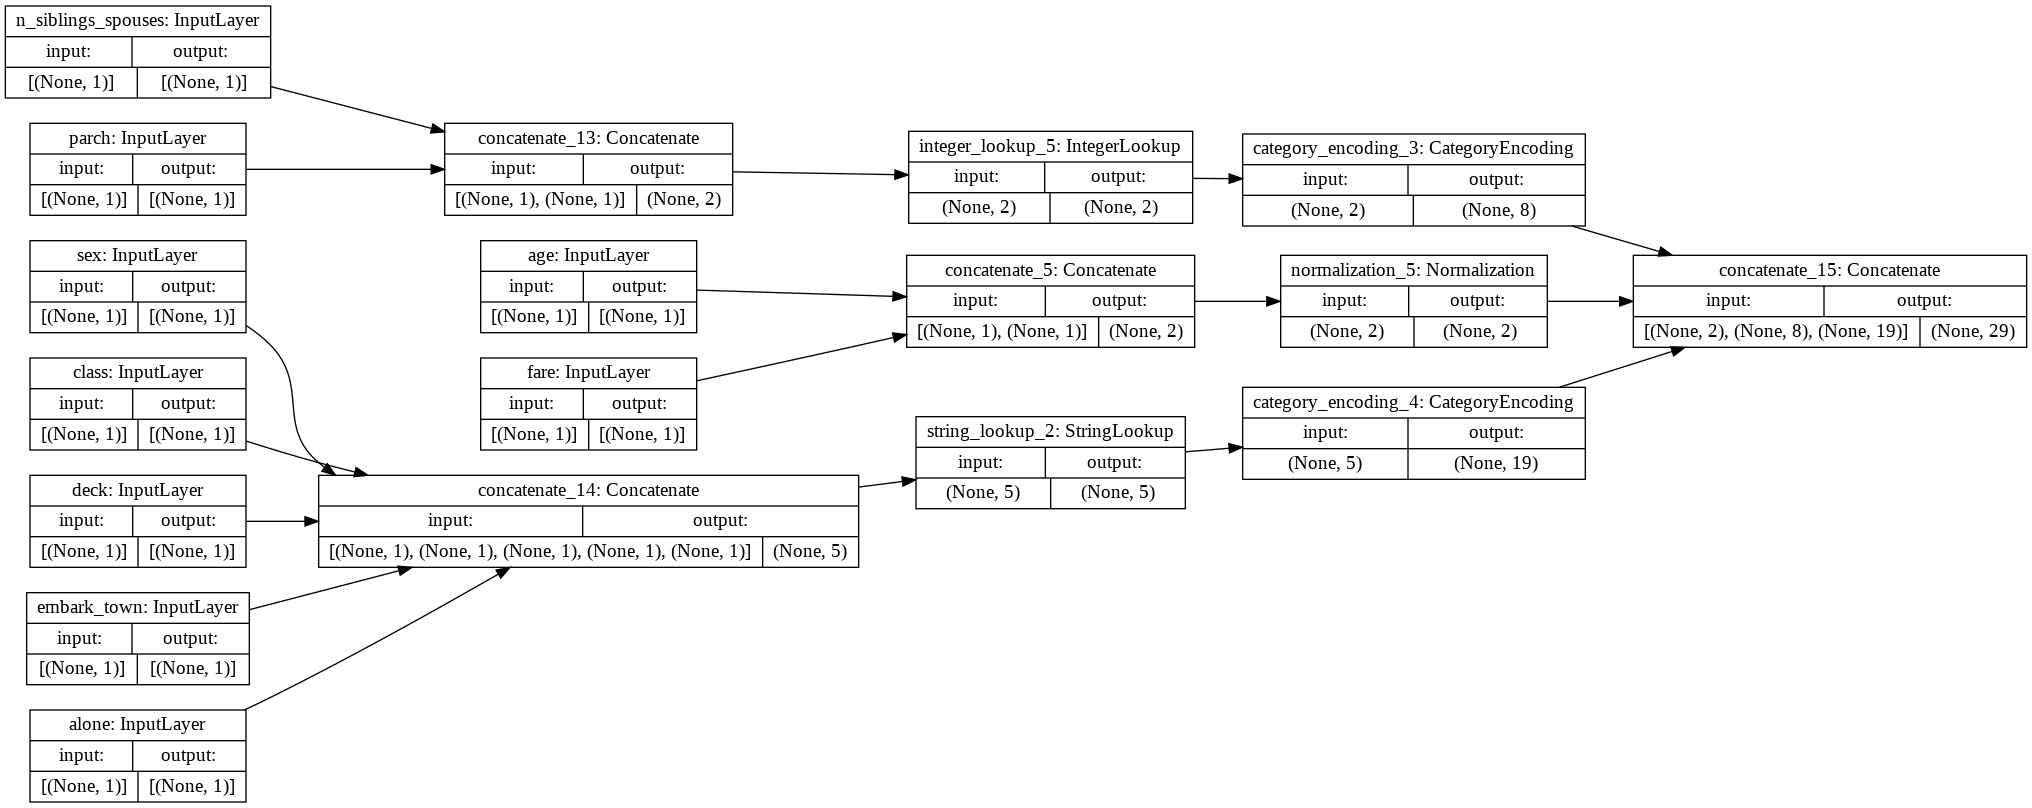

In [139]:
# plot preprocessing
tf.keras.utils.plot_model(titanic_preprocessing_model, show_shapes=True, rankdir='LR')

This model just contains the input preprocessing. You can run it to see what it does to your data. Keras models don't automatically convert Pandas DataFrames because it's not clear if it should be converted to one tensor or to a dictionary of tensors. So convert it to a dictionary of tensors:

In [152]:
titanic_features_dict = {name:np.array(value) for name, value in titanic_features.items()}

feature_dict = {name:val[:1] for name, val in titanic_features_dict.items()}

In [153]:
feature_dict

{'age': array([22.]),
 'alone': array(['n'], dtype=object),
 'class': array(['Third'], dtype=object),
 'deck': array(['unknown'], dtype=object),
 'embark_town': array(['Southampton'], dtype=object),
 'fare': array([7.25]),
 'n_siblings_spouses': array([1]),
 'parch': array([0]),
 'sex': array(['male'], dtype=object)}

In [154]:
# preprocessing
titanic_preprocessing_model(feature_dict)

<tf.Tensor: shape=(1, 29), dtype=float32, numpy=
array([[-0.610415 , -0.4974028,  0.       ,  1.       ,  1.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  1.       ,  1.       ,  1.       ,  0.       ,
         1.       ,  1.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ]], dtype=float32)>

Now build the model on top of this:

In [160]:
# titanic model building

def titanic_model_builder(preprocessor, inputs):
  # preprocessing
  prep = preprocessor(inputs)

  # body 
  hidden_layers =   tf.keras.Sequential([
                       tf.keras.layers.Dense(64, 'relu'),
                       tf.keras.layers.Dense(1)
                      ])
  
  result = hidden_layers(prep)

  return tf.keras.Model(inputs, result)
  

  

In [168]:
# model
titanic_model = titanic_model_builder(titanic_preprocessing_model, inputs)

# compile the model
titanic_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

# callback
cb = early_stop()

In [169]:
# training
titanic_model.fit(titanic_features_dict, titanic_lables, epochs=10, validation_split=0.2)

Epoch 1/10
16/16 [==============================] - 1s 19ms/step - loss: 0.7779 - accuracy: 0.4830 - val_loss: 0.7100 - val_accuracy: 0.6746
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.6068 - val_loss: 0.5952 - val_accuracy: 0.6905
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.6188 - val_loss: 0.5257 - val_accuracy: 0.7302
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5593 - accuracy: 0.6766 - val_loss: 0.4749 - val_accuracy: 0.7857
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5291 - accuracy: 0.7046 - val_loss: 0.4374 - val_accuracy: 0.8333
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.7345 - val_loss: 0.4129 - val_accuracy: 0.8413
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.7465 - val_loss: 0.3927 - val_accuracy: 0.8571
Epoch 8/10
16/16 [=